<a href="https://colab.research.google.com/github/viva198/zadaniya/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

In [ ]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
df_drop

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.a = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


<ipython-input-27-b7392ad16d15>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_median.a = df_median.Price.fillna(df_median.Price.median())


In [ ]:
df_median

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_mean.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
df_mean

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Cut'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             5
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
df_mode = df_test_nan.copy()
df_mode['Cut'] = df_mode['Cut'].fillna(df_mode['Cut'].mode()[0])
print("\n# Заполнение пропусков с помощью df.category_variable.mode()")
print(df_mode.isnull().sum()) # пропусков нет


# Заполнение пропусков с помощью df.category_variable.mode()
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
df_mode

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

In [55]:
df['extra_white'] = np.where(df['Color'] == 'D', 1, 0).astype(int)

In [ ]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'extra_white'],
      dtype='object')

In [56]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,extra_white
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,0
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,1
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,1
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,1
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,0


In [57]:
Y = df['extra_white'] # выбираем целевую переменную (категориальную)
X = df.drop('extra_white', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Color', axis=1)

5. **Графический анализ**

In [58]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight,Price
0,1.10,5169
1,0.83,3470
2,0.85,3183
3,0.91,4370
4,0.83,3171
...,...,...
5995,1.03,6250
5996,1.00,5328
5997,1.02,6157
5998,1.27,11206


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


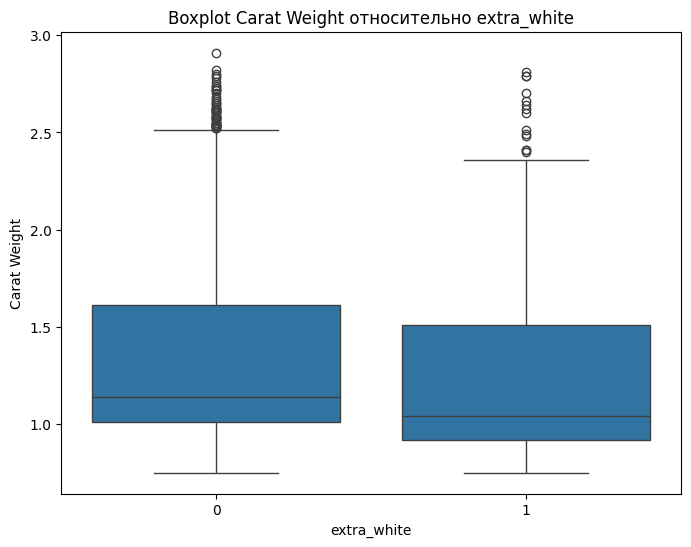

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


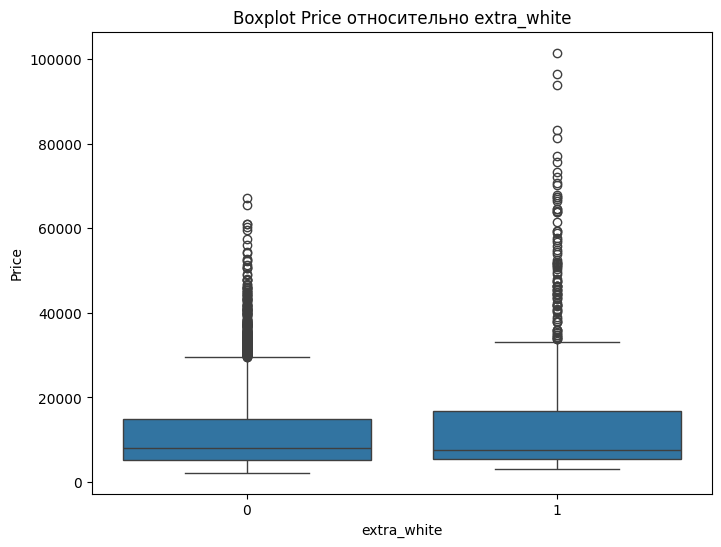

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='extra_white', y=col, data=df)
    plt.title(f'Boxplot {col} относительно extra_white')
    plt.show()

тут вроде все окей. не буду вонять что что-то не так.
1. изменения прям минимальные. выбросов стало меньше
2. получается чем выше цена, тем вероятнее что это алмаз цвета D
выбросов сало боольше

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

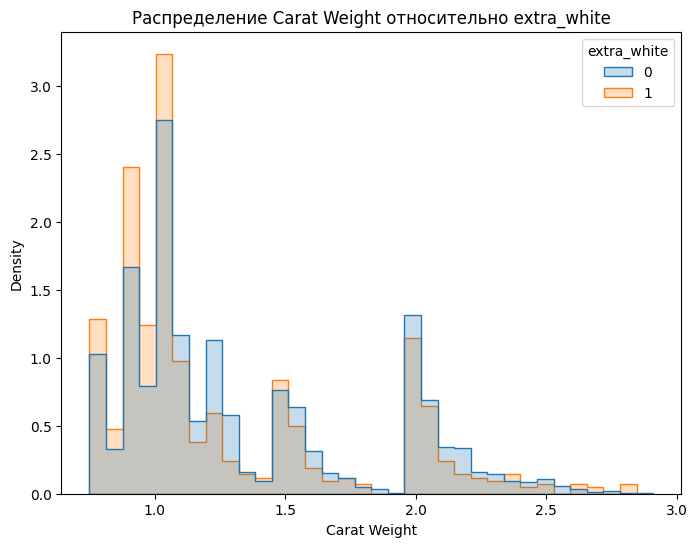

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

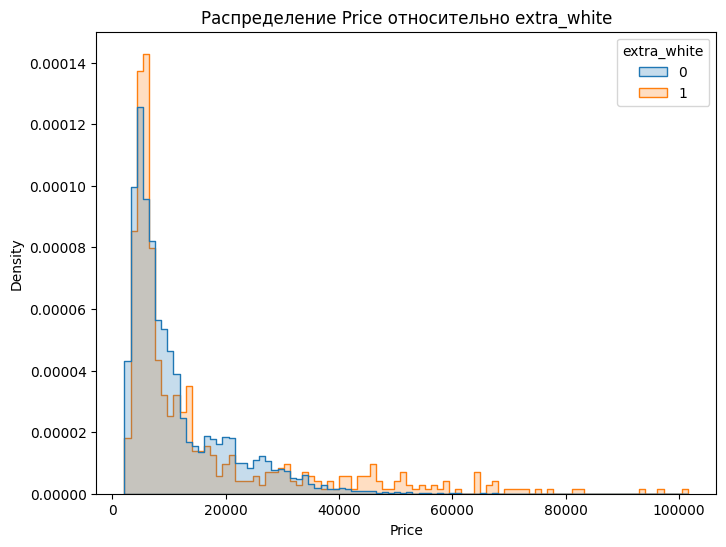

In [64]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='extra_white', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно extra_white')
    plt.show()

тут скорее всего неправильно я сделала, но по-другому не получается (シ. .)シ
1. ну почти одинаковые
2. на участке с высокой ценой больше экста белых камней (´･ᴗ･ ` )

⏰ проанализировать график, выделить значимые признаки относительно Y

In [66]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('extra_white')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('extra_white')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [68]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('extra_white')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для Carat Weight:

              count      mean       std   min   25%   50%   75%   max
extra_white                                                          
0            5339.0  1.343143  0.475835  0.75  1.01  1.14  1.61  2.91
1             661.0  1.264871  0.469151  0.75  0.92  1.04  1.51  2.81


Описательная статистика для Price:

              count          mean           std     min     25%     50%  \
extra_white                                                               
0            5339.0  11362.690204   8970.081995  2184.0  5112.5  7893.0   
1             661.0  15255.783661  16687.842648  2945.0  5380.0  7567.0   

                 75%       max  
extra_white                     
0            14922.5   67240.0  
1            16697.0  101561.0  




In [69]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Cut                     Color                  Clarity         \
            count unique    top  freq count unique top  freq   count unique   
extra_white                                                                   
0            5339      5  Ideal  2202  5339      5   G  1501    5339      6   
1             661      5  Ideal   280   661      1   D   661     661      7   

             ... Polish       Symmetry                  Report              \
             ...    top  freq    count unique top  freq  count unique  top   
extra_white  ...                                                             
0            ...     EX  2157     5339      4  VG  2161   5339      2  GIA   
1            ...     VG   285      661      4  VG   256    661      2  GIA   

                   
             freq  
extra_white        
0            4653  
1             613  

[2 rows x 24 columns]

# Описательная статистика для Carat Weight
**Количество (count)**:
Не экстра белые алмазы: 5339
Экстра белые алмазы: 661

**Среднее значение (mean)**:
1.343 для 0 и 1.265 для 1

**Стандартное** **отклонение (std)**:
Похожие значения: 0.476 и 0.469, что говорит о схожей вариативности.

**Минимум (min) и максимум (max)**:
В обоих случаях минимальные значения равны 0.75, максимумы: 2.91 и 2.81 соответственно.

# Описательная статистика для Price
**Количество (count)**:
5339 и 661 для двух категорий.

**Среднее значение (mean)**:
11362.69 для 0 и 15255.78 для 1, что указывает на значительное различие в ценах.

**Стандартное отклонение (std)**:
8970.08 для 0 и 16687.84 для 1, что указывает на больший разброс цен в группе с дополнительным белым.

**Минимум (min) и максимум (max)**:
Минимумы: 2184 и 2945, максимумы: 67240 и 101561, что также говорит о большом диапазоне цен.

# Выводы:
**Carat Weight**: Не экстра белые алмазы имеют, в среднем, больший вес.

**Price**: Цены на экстра белые алмазы значительно выше, что может указывать на то, что такие алмазики воспринимаются как более ценные.

**Вариативность**: Оба параметра имеют схожую вариативность, но для цен вариативность выше в группе с экстра белыми алмазами, что может быть связано с более широким диапазоном качества.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [70]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,extra_white
Carat Weight,1.000000,0.858562,-0.051522
Price,0.858562,1.000000,0.119695
extra_white,-0.051522,0.119695,1.000000


**Carat Weight и Price (0.858562)**: Сильная положительная корреляция. Это означает, что с увеличением веса в каратах, цена также значительно возрастает. Это ожидаемо, так как более крупные драгоценные камни обычно стоят дороже.

**Carat Weight и extra_white (-0.051522)**: Практически нулевая корреляция. Это указывает на то, что между весом в каратах и дополнительной белизной нет значимой линейной зависимости. Увеличение веса не связано с изменением уровня белизны.

**Price и extra_white (0.119695)**: Слабая положительная корреляция. Это говорит о том, что существует небольшая связь между ценой и дополнительной белизной, но она не является статистически значимой. Другими словами, цена может немного увеличиваться с повышением белизны, но это влияние незначительно.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [72]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['Cut', 'Clarity', 'Polish', 'Symmetry', 'Report', 'Price']


In [73]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [74]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,...,Price_70683,Price_72195,Price_73209,Price_75630,Price_77033,Price_81399,Price_83145,Price_93813,Price_96493,Price_101561
0,1.10,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.85,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.91,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.83,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,1.00,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,1.02,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Тру бутылки, банки, кружки, баночки тоже тру

Спрячу джина под подушку, достану поутру

Вот тогда бы мы дел наделали, вот тогда б зажгли

Все дела поотменять, потому что у меня...

In [75]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight']


In [76]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [77]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,...,Price_70683,Price_72195,Price_73209,Price_75630,Price_77033,Price_81399,Price_83145,Price_93813,Price_96493,Price_101561
0,0.162037,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.046296,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.074074,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.037037,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,0.115741,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,0.125000,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [78]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [79]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8902
Точность на тестовой выборке: 0.8908

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1068
           1       1.00      0.01      0.02       132

    accuracy                           0.89      1200
   macro avg       0.95      0.50      0.48      1200
weighted avg       0.90      0.89      0.84      1200



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [80]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


          Feature  Coefficient
737    Price_4537     1.591567
3476  Price_15821     1.485792
1965   Price_7361     1.419650
2550   Price_9502     1.410472
708    Price_4466     1.406018
...           ...          ...
864    Price_4793     0.000000
2874  Price_10907     0.000000
1966   Price_7367     0.000000
3879  Price_20009     0.000000
1115   Price_5311     0.000000

[4838 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [81]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8898
Отклонение точности: 0.0003


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

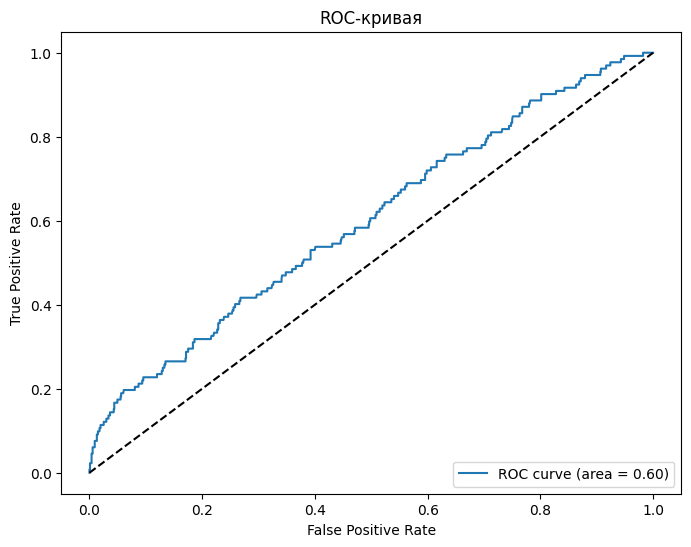

In [83]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---